## Setup

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

In [38]:
# load data
df_reviews = pd.read_csv("https://raw.githubusercontent.com/ada0110/practice-problems/main/df_reviews_sample.csv")

## Problem Statement
Following is a sample data containing movie reviews from IMDB. Let's say we want to learn a model which can predict if a review is good, average or bad. To do this, first we need to define what we mean a good, average or bad review. For now, we can consider good as `rating>=8`, average as `6<=rating<=7` and bad as `rating<=5`. So, your task is to take this dataset and add a column named `review_class` having this information. 

Bonus1: Plot the distribution of count of each `review_class`.  
Bonus2: Can you implement it in a manner such that users can pass their own definition of review classes for e.g. if they want to consider average as `5<=rating<=7` in some task and average as `6<=rating<=8` in another. 


In [39]:
df_reviews.head()

,movie,review,review_rating
0,I Know Who Killed Me,"I did not mind the movie, but I know who kille...",5/10
1,Dasvidaniya,Usually all of us make movie-watching decision...,10/10
2,The General,I would have eventually gotten around to watch...,7/10
3,Mandela,Outstanding Story and Screenplay. Kept at the ...,10/10
4,It's a Wonderful Life,I've always thought that the reason It's A Won...,10/10


## Solution

In [40]:
def rating_to_class(rating):
    """converts rating to class. for e.g. 7/10 -> 7 -> good
    """
    rating = int(rating.split("/")[0])
    if rating >= 8:
        return "good"
    elif rating >= 6:
        return "average"
    return "bad"

In [41]:
df_reviews["review_class"] = df_reviews.review_rating.apply(lambda x: rating_to_class(x))
df_reviews.head()

,movie,review,review_rating,review_class
0,I Know Who Killed Me,"I did not mind the movie, but I know who kille...",5/10,bad
1,Dasvidaniya,Usually all of us make movie-watching decision...,10/10,good
2,The General,I would have eventually gotten around to watch...,7/10,average
3,Mandela,Outstanding Story and Screenplay. Kept at the ...,10/10,good
4,It's a Wonderful Life,I've always thought that the reason It's A Won...,10/10,good


### bonus 1

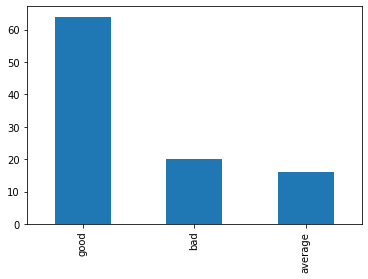

In [42]:
# we can use combination of pd.plot(kind="bar") method on pd.value_counts() to plot the distribution of review class
# use kind="barh" for horizontal bars
df_reviews.review_class.value_counts().plot(kind="bar")

- to recall how `value_counts()` work, please check problem https://www.practiceprobs.com/problemsets/python-pandas/series/baby-names/  
- `kind` parameter takes other options as well, please check https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.htm

### bonus 2

In [43]:
# to allow users to define review_class, we can add an argument to rating_to_class() method

def rating_to_class(rating, class_definition):
    """converts rating to class. for e.g. 7/10 -> 7 -> review_class
    """
    rating = int(rating.split("/")[0])
    for review_class, rating_range in class_definition.items():
        if rating in rating_range:
            return review_class


class_definition = {
                    "good": range(8, 11), # we do 11 instead of 10 because range() returns range object from [start, end-1]
                    "average": range(6, 8), 
                    "bad": range(1, 6),
                   }

df_reviews["review_class2"] = df_reviews.review_rating.apply(lambda x: rating_to_class(x, class_definition))
df_reviews.head()

,movie,review,review_rating,review_class,review_class2
0,I Know Who Killed Me,"I did not mind the movie, but I know who kille...",5/10,bad,bad
1,Dasvidaniya,Usually all of us make movie-watching decision...,10/10,good,good
2,The General,I would have eventually gotten around to watch...,7/10,average,average
3,Mandela,Outstanding Story and Screenplay. Kept at the ...,10/10,good,good
4,It's a Wonderful Life,I've always thought that the reason It's A Won...,10/10,good,good


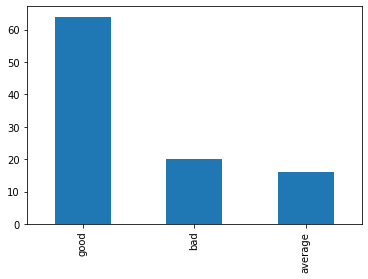

In [44]:
df_reviews.review_class2.value_counts().plot(kind="bar")

**Note:** In the above implementation, we left it upto users to make sure that their class_definition is valid i.e. if have a rating in two classes, the first matched review_class will be returned. 